# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

## Perform API Calls

In [26]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2e7be3fbf6a6ca5ee22f83c7998246c"

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | ponta delgada
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | sioux lookout
Processing Record 9 of Set 1 | mandiana
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | puerto gaitan
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | holiday
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | tyrma
Processing Record 17 of Set 1 | lorengau
Processing Record 18 of Set 1 | plettenberg bay
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | tapaua
City not found. Skipping...
Processing Record 21 of Set 1 | jujuy
City not found. Skipping...
P

Processing Record 33 of Set 4 | half moon bay
Processing Record 34 of Set 4 | guerrero negro
Processing Record 35 of Set 4 | iralaya
Processing Record 36 of Set 4 | arraial do cabo
Processing Record 37 of Set 4 | nioro
Processing Record 38 of Set 4 | dourbali
Processing Record 39 of Set 4 | faya
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | dom pedrito
Processing Record 42 of Set 4 | bismarck
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | mitu
Processing Record 45 of Set 4 | kaeo
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | oinoussai
City not found. Skipping...
Processing Record 48 of Set 4 | haimen
Processing Record 49 of Set 4 | grimshaw
Processing Record 0 of Set 5 | boende
Processing Record 1 of Set 5 | bulawayo
Processing Record 2 of Set 5 | nantucket
Processing Record 3 of Set 5 | sao filipe
Processing Record 4 of Set 5 | petauke
Processing Record 5 of Set 5 | verkhniye tatyshly
Processing Recor

Processing Record 24 of Set 8 | traralgon
Processing Record 25 of Set 8 | cayenne
Processing Record 26 of Set 8 | rolla
Processing Record 27 of Set 8 | bend
Processing Record 28 of Set 8 | kapoeta
Processing Record 29 of Set 8 | westerland
Processing Record 30 of Set 8 | neiafu
Processing Record 31 of Set 8 | arenapolis
Processing Record 32 of Set 8 | shetpe
Processing Record 33 of Set 8 | batagay-alyta
Processing Record 34 of Set 8 | kavieng
Processing Record 35 of Set 8 | umea
Processing Record 36 of Set 8 | orel-izumrud
Processing Record 37 of Set 8 | takoradi
Processing Record 38 of Set 8 | lompoc
Processing Record 39 of Set 8 | chabahar
Processing Record 40 of Set 8 | schwabisch hall
Processing Record 41 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 42 of Set 8 | salisbury
Processing Record 43 of Set 8 | pisco
Processing Record 44 of Set 8 | bud
Processing Record 45 of Set 8 | irbit
Processing Record 46 of Set 8 | luanda
Processing Record 47 of Set 8 | ayorou
P

Processing Record 14 of Set 12 | santa rosalia
Processing Record 15 of Set 12 | dembi dolo
Processing Record 16 of Set 12 | mocuba
Processing Record 17 of Set 12 | monrovia
Processing Record 18 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 12 | waldoboro
Processing Record 20 of Set 12 | ulaanbaatar
Processing Record 21 of Set 12 | comodoro rivadavia
Processing Record 22 of Set 12 | lar gerd
City not found. Skipping...
Processing Record 23 of Set 12 | diapaga
Processing Record 24 of Set 12 | cairns
Processing Record 25 of Set 12 | springville
Processing Record 26 of Set 12 | harper
Processing Record 27 of Set 12 | mercedes
Processing Record 28 of Set 12 | alvaraes
Processing Record 29 of Set 12 | aanekoski
Processing Record 30 of Set 12 | sironj
Processing Record 31 of Set 12 | quatre cocos
Processing Record 32 of Set 12 | itapirapua
Processing Record 33 of Set 12 | homa bay
Processing Record 34 of Set 12 | papagaios
Processing Record 35 of Set 12 | di

In [27]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [28]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,70.27,72,95,16.06,PF,1597287211
1,jamestown,42.10,-79.24,66.20,72,1,4.70,US,1597287207
2,ponta delgada,37.73,-25.67,69.80,83,20,3.36,PT,1597287226
3,kapaa,22.08,-159.32,84.20,66,90,12.75,US,1597287211
4,tiksi,71.69,128.87,40.69,91,100,13.35,RU,1597287228


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,19.202963,12.778342,67.257019,71.756614,47.435626,7.447937,1.597287e+09
std,34.057833,90.558919,13.887744,19.699169,39.181949,5.307771,1.159056e+02
min,-54.800000,-179.170000,30.200000,1.000000,0.000000,0.180000,1.597287e+09
25%,-9.790000,-65.650000,56.280000,60.500000,1.000000,3.500000,1.597287e+09
50%,22.270000,20.870000,68.720000,75.000000,40.000000,5.990000,1.597287e+09
75%,49.765000,85.910000,78.800000,86.000000,90.000000,9.195000,1.597287e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,36.310000,1.597288e+09


In [30]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [31]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,70.27,72,95,16.06,PF,1597287211
1,jamestown,42.10,-79.24,66.20,72,1,4.70,US,1597287207
2,ponta delgada,37.73,-25.67,69.80,83,20,3.36,PT,1597287226
3,kapaa,22.08,-159.32,84.20,66,90,12.75,US,1597287211
4,tiksi,71.69,128.87,40.69,91,100,13.35,RU,1597287228


In [32]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs. Temperature Plot

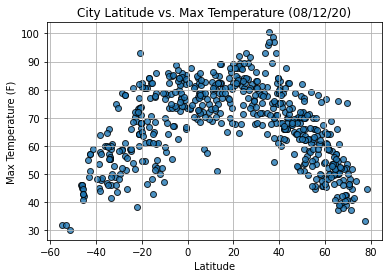

In [33]:
# Scatter plot 
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save png file
plt.savefig("output_data/Fig1.png")


plt.show()

## Latitude vs. Humidity Plot

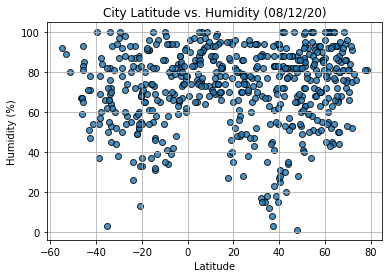

In [34]:
# Scatter plot 
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save png file
plt.savefig("output_data/Fig2.png")


plt.show()

## Latitude vs. Cloudiness Plot

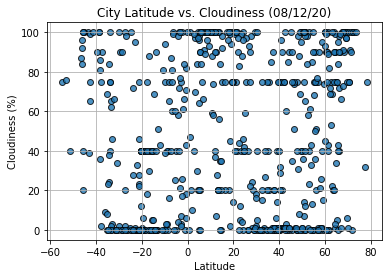

In [35]:
# Scatter plot 
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

Save png file
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

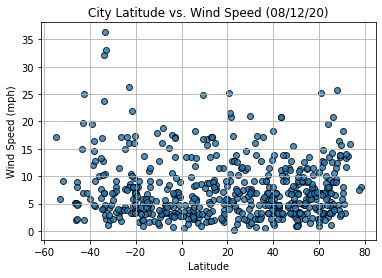

In [36]:
# Scatter plot 
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [48]:
#Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [49]:
# DataFrames for Northern and Southern Hemispheres
northern_h_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_h_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-value is: 0.5172470281798737


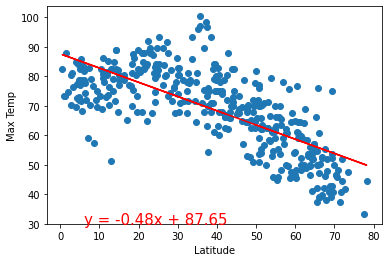

In [50]:
# Northern Hemisphere Linear Regression
x_values = northern_h_df["Lat"]
y_values = northern_h_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.4942120616988064


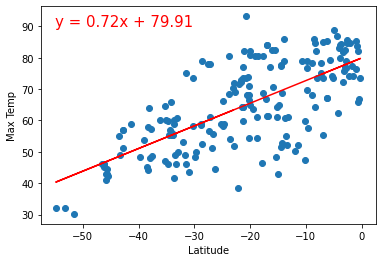

In [51]:
# Linear Regression on Southern Hemisphere
x_values = southern_h_df["Lat"]
y_values = southern_h_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The r value shows a high correlation between latitude and max temperature.

### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00046301632169036376


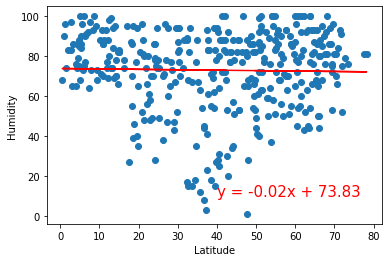

In [52]:
# Northern Hemisphere
x_values = northern_h_df["Lat"]
y_values = northern_h_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.0015766269249641786


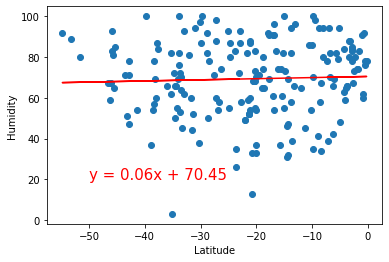

In [53]:
# Southern Hemisphere
x_values = southern_h_df["Lat"]
y_values = southern_h_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The r value shows a small relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.000503032678853914


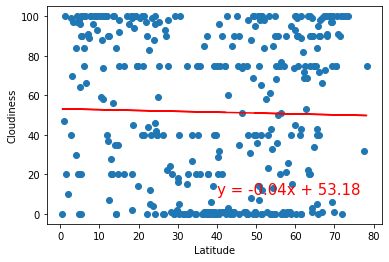

In [54]:
# Northern Hemisphere
x_values = northern_h_df["Lat"]
y_values = northern_h_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.024011329709024243


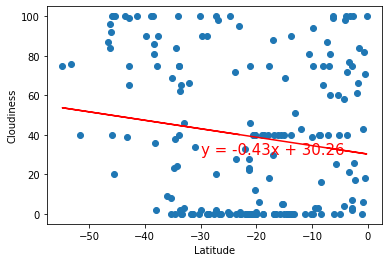

In [55]:
# Southern Hemisphere
x_values = southern_h_df["Lat"]
y_values = southern_h_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The r value shows a small correlation between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005066039360705134


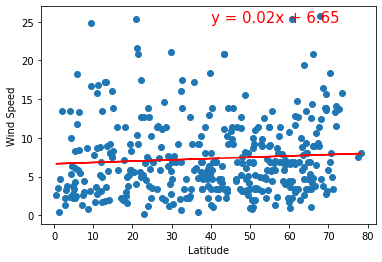

In [56]:
# Northern Hemisphere
x_values = northern_h_df["Lat"]
y_values = northern_h_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.04040096174466826


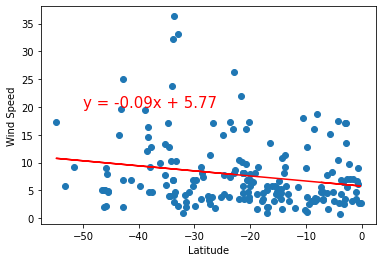

In [57]:
# Southern Hemisphere
x_values = southern_h_df["Lat"]
y_values = southern_h_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

The r value displays no correlation with latitude and windspeed.